In [41]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
from matplotlib import collections
import sys

main_dir = ''
func_dir = main_dir + 'utils/'
fig_dir = main_dir + 'results/paper_figures/'

sys.path.insert(0,func_dir)

from neuron_properties_functions import create_empty_mouse_stats_dict, get_split_half_r_all_mice, get_SNR_all_mice, get_max_corr_vals_all_mice
from neuron_properties_functions import create_empty_monkey_stats_dict, get_SNR_monkey_all_dates, get_split_half_r_monkey_all_dates, get_max_corr_vals_monkey_all_dates, get_evar_monkey_all_dates, store_macaque_alphas
import mouse_data_functions as cs
from fig_5_functions import make_mouse_df, fig5_violinplot, plot_corrs_sns,fig5_supp_violinplot, process_evar_subsample_seeds, make_monkey_df, add_anova_stars_2_sets_5_conditions, add_stars_2_sets
from macaque_data_functions import get_resps, get_get_condition_type


## Mouse stimulus vs. gray screen comparisons 

no need to control for frame size as the frames are similar in size

### coding

In [ ]:
mouse_stats= create_empty_mouse_stats_dict(main_dir)
get_SNR_all_mice(main_dir, mouse_stats)
get_split_half_r_all_mice(main_dir, mouse_stats)
get_max_corr_vals_all_mice(main_dir, mouse_stats)

In [4]:
dataset_types = ['ori32', 'natimg32']
min_stimulus_frame_lengths = []
for dataset_type in dataset_types:
    mt = cs.mt_retriever(main_dir, dataset_type=dataset_type)
    mousenames= sorted(mt.filenames)
    for mouse in mousenames:
        _, resp_L23,_,  _, resp_L4 = mt.retrieve_layer_activity('resp', mouse)
        min_stimulus_frame_lengths.append(resp_L23.shape[0])
        _, resp_L23_spont, _, _, resp_L4_spont = mt.retrieve_layer_activity('spont', mouse)
        if len(resp_L23_spont)<1000:
            continue
        print(resp_L23.shape[0], resp_L23_spont.shape[0])


3200 3700
1920 2220
3200 3700
3200 3700
3648 4218
3072 3552


### plotting

In [3]:
df_mouse_all = make_mouse_df(mouse_stats, dataset_types=['ori32','natimg32','ori32_spont','natimg32_spont'])
df_mouse  = df_mouse_all[df_mouse_all['Mouse Name']!='MP027']#remove mouse 27 since it doesnt have a grey screen period
df_mouse_visual =  df_mouse[(df_mouse['SNR']>2)&(df_mouse['Split-half r']>0.8)] 
df_mouse_nonvisual =  df_mouse[(df_mouse['SNR']<2)&(df_mouse['Split-half r']<0.8)]

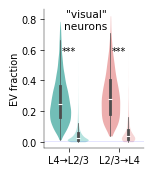

In [4]:
neuron_property='EV'
variable1='Direction'
variable2='Activity Type'

fontsize=7
fig, ax = plt.subplots(figsize=(1.3,1.8))

fig5_violinplot(df_mouse_visual, x=variable1, y=neuron_property, 
                hue=variable2, ax=ax, y_label='EV fraction', linewidth=0,gap=-0.2, width=0.7,cut=0)
ax.set_title('"visual"\nneurons', fontsize=fontsize*1.1, x=0.42, y=0.8)
plt.show()

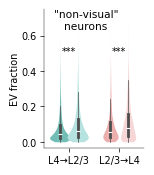

In [6]:
fig, ax = plt.subplots(figsize=(1.3,1.8))

fig5_violinplot(df_mouse_nonvisual, x=variable1, y=neuron_property, 
                hue=variable2, ax=ax, y_label='EV fraction', linewidth=0,gap=-0.2, width=0.7,cut=0)
ax.set_title('"non-visual"\nneurons', fontsize=fontsize*1.1, x=0.42, y=0.8)
plt.show()

In [8]:
df_mouse_corr=pd.merge(df_mouse[df_mouse['Activity Type']=='stimulus'],df_mouse[df_mouse['Activity Type']=='gray screen'], on=['Mouse', 'Mouse Name', 'Area',
       'Direction', 'SNR', 'Split-half r','control_shuffle'])
df_mouse_corr_visual =  df_mouse_corr[(df_mouse_corr['SNR']>2)&(df_mouse_corr['Split-half r']>0.8)&(df_mouse_corr['control_shuffle']==False)] 
df_mouse_corr_nonvisual =  df_mouse_corr[(df_mouse_corr['SNR']<2)&(df_mouse_corr['Split-half r']<0.8)&(df_mouse_corr['control_shuffle']==False)]

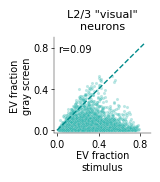

In [11]:
figsize=(1.25,1.25)
fig, ax = plt.subplots(figsize=figsize)
area="L2/3"
plot_corrs_sns(df_mouse_corr_visual, x='EV_x', y='EV_y', area=area,
               ax=ax, xy=(0.01,0.75), color='lightseagreen', alpha=0.3, s=5)
ax.set_title(f'{area} "visual"\nneurons', fontsize=8)
plt.show()

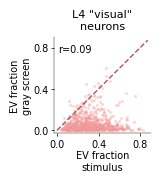

In [12]:
figsize=(1.25,1.25)
fig, ax = plt.subplots(figsize=figsize)
area="L4"
plot_corrs_sns(df_mouse_corr_visual, x='EV_x', y='EV_y', area=area,
               ax=ax, xy=(0.01,0.75), color='lightseagreen', alpha=0.3, s=5)
ax.set_title(f'{area} "visual"\nneurons', fontsize=8)
plt.show()

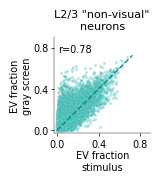

In [13]:
fig, ax = plt.subplots(figsize=figsize)
area="L2/3"
plot_corrs_sns(df_mouse_corr_nonvisual, x='EV_x', y='EV_y', area=area,
               ax=ax, xy=(0.01,0.75), color='lightseagreen', alpha=0.3, s=5)
ax.set_title(f'{area} "non-visual"\nneurons', fontsize=8)
plt.show()

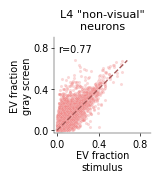

In [14]:
fig, ax = plt.subplots(figsize=figsize)
area="L4"
plot_corrs_sns(df_mouse_corr_nonvisual, x='EV_x', y='EV_y', area=area,
               ax=ax, xy=(0.01,0.75), color='lightseagreen', alpha=0.3, s=5)
ax.set_title(f'{area} "non-visual"\nneurons', fontsize=8)
plt.show()

### supplemental 

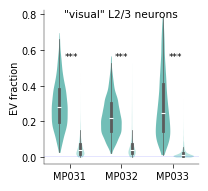

In [16]:
area='L2/3'
x='Mouse Name'
y='EV'
hue='Activity Type'
y_label='EV fraction'
fontsize=7


fig, ax = plt.subplots(figsize=(2,2))
fig5_supp_violinplot(df_mouse_visual,area, x, y, hue, ax, y_label, linewidth=0,cut=0,
                    fontsize=fontsize,plot_control_ev=True, show_legend=False,leg_loc=(1,0.3))
ax.set_title(f'"visual" {area} neurons', fontsize=fontsize*1.1, x=0.5, y=0.9)
plt.show()

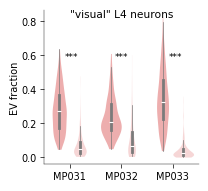

In [17]:
area='L4'

fig, ax = plt.subplots(figsize=(2,2))
fig5_supp_violinplot(df_mouse_visual,area, x, y, hue, ax, y_label, linewidth=0,cut=0,
                    fontsize=fontsize,plot_control_ev=True, show_legend=False,leg_loc=(1,0.3))
ax.set_title(f'"visual" {area} neurons', fontsize=fontsize*1.1, x=0.5, y=0.9)
plt.show()

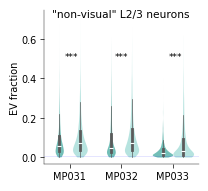

In [18]:
area='L2/3'

fig, ax = plt.subplots(figsize=(2,2))
fig5_supp_violinplot(df_mouse_nonvisual,area, x, y, hue, ax, y_label, linewidth=0,cut=0,
                    fontsize=fontsize,plot_control_ev=True, show_legend=False,leg_loc=(1,0.3))
ax.set_title(f'"non-visual" {area} neurons', fontsize=fontsize*1.1, x=0.5, y=0.9)
plt.show()

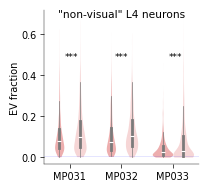

In [19]:
area='L4'

fig, ax = plt.subplots(figsize=(2,2))
fig5_supp_violinplot(df_mouse_nonvisual,area, x, y, hue, ax, y_label, linewidth=0,cut=0,
                    fontsize=fontsize,plot_control_ev=True, show_legend=False,leg_loc=(1,0.3))
ax.set_title(f'"non-visual" {area} neurons', fontsize=fontsize*1.1, x=0.5, y=0.9)
plt.show()

## Monkey stimulus vs. gray screen vs. lights off comparisons

### coding

In [ ]:
monkey_stats= create_empty_monkey_stats_dict()
get_SNR_monkey_all_dates(monkey_stats)
get_split_half_r_monkey_all_dates(monkey_stats)
get_max_corr_vals_monkey_all_dates(monkey_stats)
store_macaque_alphas(main_dir, monkey_stats, verbose=True)
get_evar_monkey_all_dates(monkey_stats)


In [3]:

start_time = time.time()

dates = ['090817', '100817', '250717']
areas=['V1','V4']
w_size=25
condition_type1 = 'SNR'
condition_type2 = 'SNR_spont'
SNR_lengths = []
SNR_spont_lengths = []
min_lengths = {}
for d, date in enumerate(dates):
    # print(area)
    resp_V4, resp_V1 =get_resps(condition_type=get_get_condition_type(condition_type1), date=date, w_size=w_size)
    SNR_lengths.append(resp_V4.shape[0])
    resp_V4, resp_V1 =get_resps(condition_type=get_get_condition_type(condition_type2), date=date, w_size=w_size)
    SNR_spont_lengths.append(resp_V4.shape[0])
    min_lengths[date]=min(SNR_lengths[-1],SNR_spont_lengths[-1])
print('SNR', SNR_lengths)
print('SNR_spont', SNR_spont_lengths)
print('min lengths',min_lengths)

end_time = time.time()
elapsed_time = (end_time - start_time)/60

print(f'Took {elapsed_time:.4f} minutes to complete')  

SNR [1120, 1216, 1072]
SNR_spont [840, 912, 804]
min lengths {'090817': 840, '100817': 912, '250717': 804}
Took 0.2082 minutes to complete


In [16]:

start_time = time.time()
initial_seed = 17
rng = np.random.default_rng(initial_seed)
# Generate 10 random seed values
num_seeds = 10
seeds = rng.integers(low=0, high=np.iinfo(np.int32).max, size=num_seeds)

from joblib import Parallel, delayed
dates = ['090817', '100817', '250717']
condition_types = ['SNR','RS', 'RS_open', 'RS_closed']
area='V4'
area2='V1'

sample_size=500
alpha=monkey_stats['monkey_alphas'][sample_size]['V4']
alpha2=monkey_stats['monkey_alphas'][sample_size]['V1']

seed=17

for condition_type in condition_types:
    for date in monkey_stats[condition_type]:
        resp_V4, resp_V1, =get_resps(condition_type=get_get_condition_type(condition_type), date=date, w_size=w_size)
        
        if condition_type ==monkey_stats['monkey_alphas'][sample_size]['condition_type_used'] and date==monkey_stats['monkey_alphas'][sample_size]['date_used']:
            resp_V4=resp_V4[sample_size:]
            resp_V1=resp_V1[sample_size:]
            
        results = Parallel(n_jobs=-1)(delayed(process_evar_subsample_seeds)(resp_V1, resp_V4, date, min_lengths, seed, alpha, 
                                                                            alpha2, condition_type) for seed in seeds)
        all_v4_evars = np.array([a for a,_ in results])
        all_v1_evars = np.array([a for _,a in results])
        monkey_stats[condition_type][date][area]['spont_comparison_evars']=all_v4_evars
        monkey_stats[condition_type][date][area2]['spont_comparison_evars']=all_v1_evars
    print(f'{condition_type} done')

end_time = time.time()
elapsed_time = (end_time - start_time)/60
print(f'Yay! work is completed. Took {elapsed_time:.4f} minutes to complete')   

SNR done
RS done
RS_open done
RS_closed done
Yay! work is completed. Took 3.2949 minutes to complete


In [18]:
### shuffle control
start_time = time.time()
for condition_type in condition_types:
    for date in monkey_stats[condition_type]:
        resp_V4, resp_V1, =get_resps(condition_type=get_get_condition_type(condition_type), date=date, w_size=w_size)
        
        if condition_type ==monkey_stats['monkey_alphas'][sample_size]['condition_type_used'] and date==monkey_stats['monkey_alphas'][sample_size]['date_used']:
            resp_V4=resp_V4[sample_size:]
            resp_V1=resp_V1[sample_size:]
        
        results = Parallel(n_jobs=-1)(delayed(process_evar_subsample_seeds)(resp_V1, resp_V4, date, min_lengths, seed, alpha,
                                                                            alpha2, condition_type, control_shuffle=True) for seed in seeds)
        all_v4_evars = np.array([a for a,_ in results])
        all_v1_evars = np.array([a for _,a in results])
        monkey_stats[condition_type][date][area]['spont_comparison_evars_null']=all_v4_evars
        monkey_stats[condition_type][date][area2]['spont_comparison_evars_null']=all_v1_evars
    print(f'{condition_type} done')
end_time = time.time()
elapsed_time = (end_time - start_time)/60
print(f'Yay! work is completed. Took {elapsed_time:.4f} minutes to complete') 

SNR done
RS done
RS_open done
RS_closed done
Yay! work is completed. Took 3.3441 minutes to complete


### plotting

In [20]:
df_monkey = make_monkey_df(monkey_stats, dataset_types=['SNR','SNR_spont','RS','RS_open','RS_closed'], spont_comparisons=True)
df_monkey_visual =  df_monkey[(df_monkey['SNR']>2)&(df_monkey['Split-half r']>0.8)] 


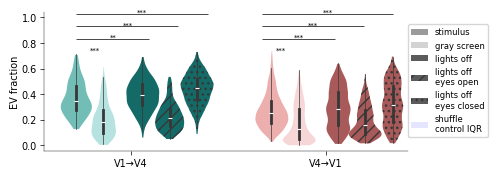

In [21]:
neuron_property='EV'
variable1='Direction'
variable2='Activity Type'

fontsize=7
figsize=(4.7,1.8)
fig, ax = plt.subplots(figsize=figsize)
fig5_violinplot(df_monkey_visual, x=variable1, y=neuron_property, 
                hue=variable2, ax=ax, y_label='EV fraction', palette=['#9b9b9b','lightgray','#5b5b5b','#5b5b5b','#5b5b5b'],
                linewidth=0,gap=-0.2, width=0.7,cut=0, animal='monkey', show_legend=True, leg_loc=(1,0.1))
plt.show()

In [24]:
df_monkey_corr_ = df_monkey_visual[df_monkey_visual['Activity Type']=='stimulus']
for act_type in df_monkey['Activity Type'].unique()[1:]:
    df_copy = df_monkey_visual[df_monkey_visual['Activity Type']==act_type].copy()
    df_copy.rename(columns={'EV': f'EV {act_type}', 'Activity Type':f'Activity Type {act_type}', 'max corr. val': f'max corr. val{act_type}','Dataset Type':f'Dataset Type {act_type}'}, inplace=True)
    df_monkey_corr_= pd.merge(df_monkey_corr_ ,df_copy, on=['Date', 'Area',
    'Direction', 'SNR', 'Split-half r','control_shuffle'])
df_monkey_corr = df_monkey_corr_[df_monkey_corr_['control_shuffle']==False]

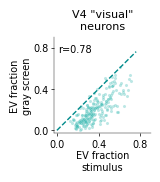

In [25]:
figsize=(1.25,1.25)
fig, ax = plt.subplots(figsize=figsize)
area="V4"
plot_corrs_sns(df_monkey_corr, x='EV', y='EV gray screen', area=area,
               ax=ax, xy=(0.01,0.75), alpha=0.3, s=5)
ax.set_title(f'{area} "visual"\nneurons', fontsize=8)
plt.show()



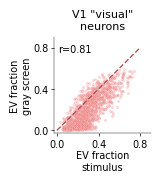

In [26]:
figsize=(1.25,1.25)
fig, ax = plt.subplots(figsize=figsize)
area="V1"
plot_corrs_sns(df_monkey_corr, x='EV', y='EV gray screen', area=area,
            ax=ax, xy=(0.01,0.75), alpha=0.3, s=5)
ax.set_title(f'{area} "visual"\nneurons', fontsize=8)
plt.show()

### supplemental

#### coding

In [33]:
start_time = time.time()
dates = ['260617', '280617']
areas=['V1','V4']
w_size=25
get_condition_type = 'RF_spont'
min_lengths = {}
for d, date in enumerate(dates):
    # print(area)
    resp_V4, resp_V1 =get_resps(condition_type=get_condition_type, date=date, w_size=w_size)
    min_lengths[date]=resp_V4.shape[0]
print('min lengths',min_lengths)
end_time = time.time()
elapsed_time = (end_time - start_time)/60
print(f'Took {elapsed_time:.4f} minutes to complete')  

min lengths {'260617': 8592, '280617': 11124}
Took 0.7387 minutes to complete


In [34]:

start_time = time.time()
initial_seed = 17
rng = np.random.default_rng(initial_seed)
# Generate 10 random seed values
num_seeds = 10
seeds = rng.integers(low=0, high=np.iinfo(np.int32).max, size=num_seeds)

from joblib import Parallel, delayed
dates = ['260617', '280617']
condition_types = ['RF_large','RF_thin']
area='V4'
area2='V1'

sample_size=500
alpha=monkey_stats['monkey_alphas'][sample_size]['V4']
alpha2=monkey_stats['monkey_alphas'][sample_size]['V1']

seed=17

for condition_type in condition_types:
    for date in monkey_stats[condition_type]:
        resp_V4, resp_V1, =get_resps(condition_type=get_get_condition_type(condition_type), date=date, w_size=w_size)
        results = Parallel(n_jobs=-1)(delayed(process_evar_subsample_seeds)(resp_V1, resp_V4, date, min_lengths, seed, alpha, alpha2, condition_type) for seed in seeds)
        all_v4_evars = np.array([a for a,_ in results])
        all_v1_evars = np.array([a for _,a in results])
        monkey_stats[condition_type][date][area]['spont_comparison_evars']=all_v4_evars
        monkey_stats[condition_type][date][area2]['spont_comparison_evars']=all_v1_evars
    print(f'{condition_type} done')

end_time = time.time()
elapsed_time = (end_time - start_time)/60
print(f'Yay! work is completed. Took {elapsed_time:.4f} minutes to complete')   

RF_large done
RF_thin done
Yay! work is completed. Took 1.1540 minutes to complete


In [35]:
### shuffle control
start_time = time.time()
for condition_type in condition_types:
    for date in monkey_stats[condition_type]:
        resp_V4, resp_V1, =get_resps(condition_type=get_get_condition_type(condition_type), date=date, w_size=w_size)
        results = Parallel(n_jobs=-1)(delayed(process_evar_subsample_seeds)(resp_V1, resp_V4, date, min_lengths, seed, 
                                                                            alpha, alpha2, condition_type, control_shuffle=True) for seed in seeds)
        all_v4_evars = np.array([a for a,_ in results])
        monkey_stats[condition_type][date][area]['spont_comparison_evars_null']=all_v4_evars
        monkey_stats[condition_type][date][area2]['spont_comparison_evars_null']=all_v1_evars
    print(f'{condition_type} done')
end_time = time.time()
elapsed_time = (end_time - start_time)/60
print(f'Yay! work is completed. Took {elapsed_time:.4f} minutes to complete') 

RF_large done
RF_thin done
Yay! work is completed. Took 1.1919 minutes to complete


#### plotting

In [27]:

data = []
for condition_type in df_monkey_visual['Activity Type'].unique():
    for date in df_monkey_visual.Date.unique():
        for pred_type in df_monkey_visual.Direction.unique():
            data.append({
                'Activity Type':condition_type,
                'Date': date,
                'Direction': pred_type,
                'EV_corr_w_SNR':df_monkey_visual[(df_monkey_visual['Activity Type'] =='stimulus')&(df_monkey_visual.Direction==pred_type)&(df_monkey_visual.Date==date)&(df_monkey_visual.control_shuffle==False)].reset_index()['EV'].corr(df_monkey_visual[(df_monkey_visual['Activity Type'] ==condition_type)&(df_monkey_visual.Direction==pred_type)&(df_monkey_visual.Date==date)&(df_monkey_visual.control_shuffle==False)].reset_index()['EV'])
            })
df_SNR_EV_corr = pd.DataFrame(data) 

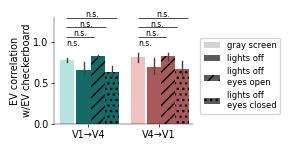

In [30]:
from matplotlib import patches

directions = ['V1→V4', 'V4→V1']
fig, ax=plt.subplots(figsize=(1.8,1.4))
sns.barplot(df_SNR_EV_corr[df_SNR_EV_corr['Activity Type'].isin(df_SNR_EV_corr['Activity Type'].unique()[1:])], 
            x=variable1, order = directions, y='EV_corr_w_SNR', palette=['lightgray','#5b5b5b','#5b5b5b','#5b5b5b'],
            hue='Activity Type',
            width=0.8, ax=ax,
            err_kws={'linewidth': 1}
            )

custom_colors = ['#B6E3DF','#F1C0C0',
                '#136a66','#a85959',
                '#136a66','#a85959',
                '#136a66','#a85959',]
bars  = [s for s in ax.get_children() if isinstance(s, patches.Rectangle)]
lines = ax.get_lines()
offset_val=0.03
hatch_size=3
for b, (bar, line, color)in enumerate(zip(bars, lines, custom_colors)):
    bar.set_facecolor(color)
    if b==4 or b==5:
        bar.set_hatch('/'*hatch_size)
    if b==6 or b==7:
        bar.set_hatch('.'*hatch_size)
    if b>1:
        line.set_xdata(line.get_xdata()+offset_val)
        bar.set_x(bar.get_x()+offset_val)

hatches = [None,None,'/','.',None]
new_handles = []
for handle, hatch in zip(ax.get_legend_handles_labels()[0], hatches):
    if hatch is not None:
        handle.set_hatch(hatch*hatch_size)
    new_handles.append(handle)
ax.legend(loc=(1.05,0.1), handles = new_handles, fontsize=6)

ax.tick_params(axis='both', labelsize=7,  width=0.5, length=2, pad=2)
ax.set_xticks(ticks=ax.get_xticks(), labels=['V1→V4', 'V4→V1'])
ax.set_ylabel('EV correlation\nw/EV checkerboard', fontsize=7, labelpad=1)
ax.set_xlabel(None)
ax.spines[:].set_linewidth(0.3)
ax.set_ylim(0,1.3)


add_anova_stars_2_sets_5_conditions(df_SNR_EV_corr[df_SNR_EV_corr["Activity Type"].isin(df_SNR_EV_corr['Activity Type'].unique()[1:])],
                                    neuron_property='EV_corr_w_SNR', x=variable1,
                                    x_order=directions,hue='Activity Type',hue_order=df_SNR_EV_corr['Activity Type'].unique()[1:], 
                                    ax=ax, fontsize=5.5)

sns.despine()
plt.show()

In [39]:
df_monkey_RF = make_monkey_df(monkey_stats, dataset_types=['RF_large','RF_large_spont','RF_thin','RF_thin_spont'], spont_comparisons=True)
df_monkey_RF_visual =  df_monkey[(df_monkey['SNR']>2)&(df_monkey['Split-half r']>0.8)]

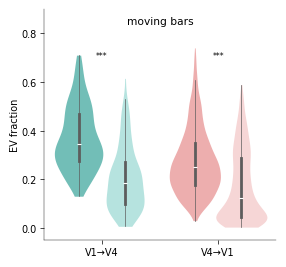

In [42]:
figsize=(3,3)
fontsize=7
label_order=['V1→V4', 'V4→V1']
hue_order=['stimulus', 'gray screen']
x='Direction'
y='EV'
hue='Activity Type'
fig, ax = plt.subplots(figsize=figsize)

sns.violinplot(x=x, y=y, hue=hue, 
                data=df_monkey_RF_visual[df_monkey_RF_visual['control_shuffle']==False],ax=ax,order=label_order, hue_order=hue_order,
                inner='box',linewidth=0,saturation=1, gap=-.1, width=0.8,
                inner_kws={'box_width':2, 'whis_width':0.5,
                            'marker':'_', 'markersize':3,
                            'markeredgewidth':0.8,
                            },palette=['#9b9b9b','lightgray'],cut=0,
                            )

ax.legend_.remove()
custom_colors = ['#72BEB7','#B6E3DF',
                '#EDAEAE', '#f6d6d6',]
violins  = [s for s in ax.get_children() if isinstance(s, collections.PolyCollection)]
for violin, color in zip(violins, custom_colors):
    violin.set_facecolor(color)

ax.tick_params(axis='both', labelsize=fontsize, width=0.5, length=3, pad=2)
ax.set_ylabel('EV fraction', fontsize=fontsize, labelpad=1)
ax.set_xlabel(None)
ax.set_ylim(bottom=-0.05,top=0.9)
sns.despine()
add_stars_2_sets(df_monkey_RF_visual[df_monkey_RF_visual['control_shuffle']==False], neuron_property, variable1, 
                    x_order=directions,hue=variable2, 
                    ax=ax, fontsize=5.5, mouse_or_date='Date', 
                    height1=0.8, height2=0.8,
                    perm_type='paired')
ax.spines[:].set_linewidth(0.3)
ax.set_title('moving bars', fontsize=fontsize*1.1, x=0.5, y=0.9)
data = df_monkey_RF_visual[df_monkey_RF_visual['control_shuffle']==True][neuron_property]
per_25 = np.percentile(data.dropna().values, 25)
per_75 = np.percentile(data.dropna().values, 75)
ax.axhspan(per_25, per_75, alpha=0.1, color='blue', label='shuffle\ncontrol IQR',
        linewidth=0)
plt.show()

